<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap16/16_3_Contraction_Mappings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 16.3: Contraction mappings**

This notebook investigates a 1D normalizing flows example similar to that illustrated in figure 16.9 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a function that is a contraction mapping
def f(z):
    return 0.3 + 0.5 *z + 0.02 * np.sin(z*15)

In [3]:
def draw_function(f, fixed_point=None):
  z = np.arange(0,1,0.01)
  z_prime = f(z)

  # Draw this function
  fig, ax = plt.subplots()
  ax.plot(z, z_prime,'c-')
  ax.plot([0,1],[0,1],'k--')
  if fixed_point!=None:
    ax.plot(fixed_point, fixed_point, 'ro')
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_xlabel('Input, $z$')
  ax.set_ylabel('Output, f$[z]$')
  plt.show()

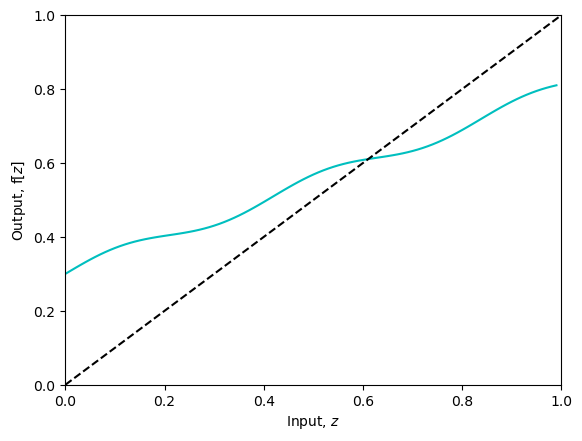

In [4]:
draw_function(f)

Now let's find where $\text{f}[z]=z$ using fixed point iteration

In [8]:
# Takes a function f and a starting point z
def fixed_point_iteration(f, z0):
  # TODO -- write this function
  # Print out the iterations as you go, so you can see the progress
  # Set the maximum number of iterations to 20
  # Replace this line
  max_iterations = 20
  z = z0
  for i in range(max_iterations):
      z_new = f(z)
      print(f"Iteration {i+1}: z = {z_new:.6f}")
        
      if abs(z_new - z) < 1e-6:  # Convergence check
          print("Converged")
          return z_new
        
      z = z_new
    
  print("Maximum iterations reached without convergence.")
  return z


Now let's test that and plot the solution

Iteration 1: z = 0.402822
Iteration 2: z = 0.496641
Iteration 3: z = 0.566707
Iteration 4: z = 0.599316
Iteration 5: z = 0.608087
Iteration 6: z = 0.610020
Iteration 7: z = 0.610431
Iteration 8: z = 0.610518
Iteration 9: z = 0.610536
Iteration 10: z = 0.610540
Iteration 11: z = 0.610541
Converged!


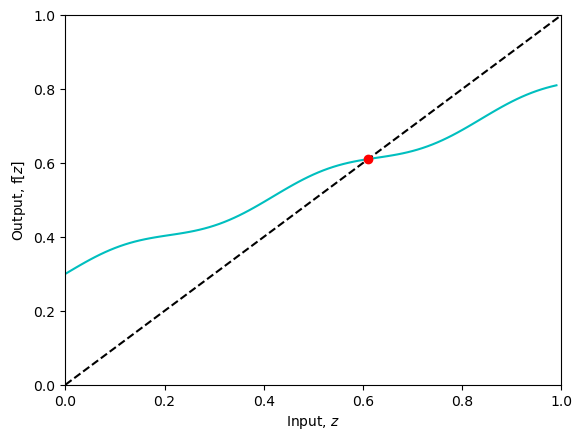

In [9]:
# Now let's test that
z = fixed_point_iteration(f, 0.2)
draw_function(f, z)

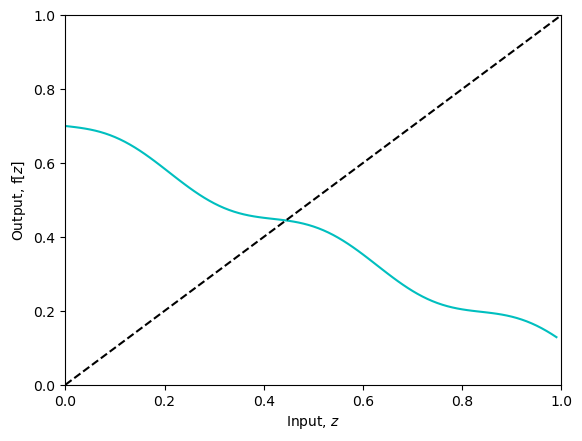

In [10]:
# Let's define another function
def f2(z):
    return 0.7 + -0.6 *z + 0.03 * np.sin(z*15)
draw_function(f2)

Iteration 1: z = 0.184114
Iteration 2: z = 0.600656
Iteration 3: z = 0.351700
Iteration 4: z = 0.463612
Iteration 5: z = 0.440486
Iteration 6: z = 0.445262
Iteration 7: z = 0.444408
Iteration 8: z = 0.444565
Iteration 9: z = 0.444536
Iteration 10: z = 0.444541
Iteration 11: z = 0.444540
Converged!


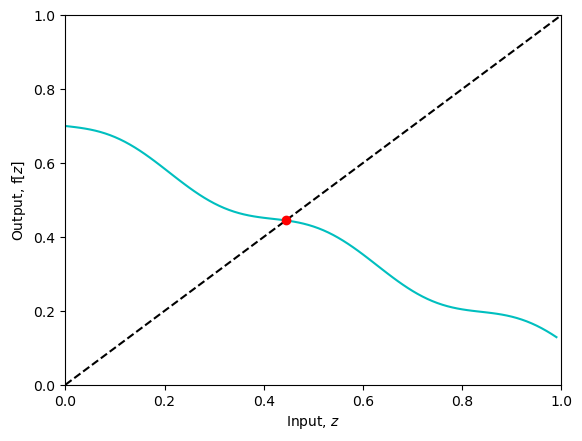

In [11]:
# Now let's test that
# TODO Before running this code, predict what you think will happen
#Converged
z = fixed_point_iteration(f2, 0.9)
draw_function(f2, z)

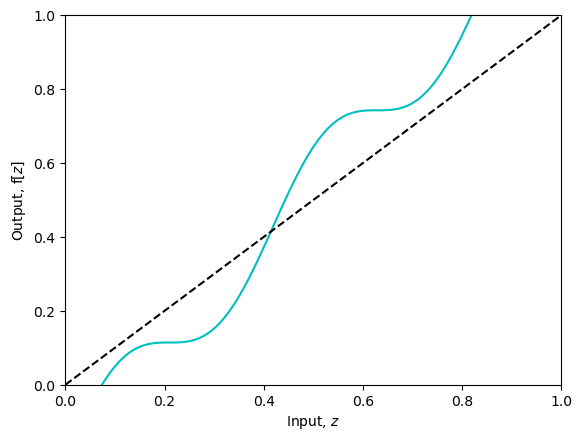

In [12]:
# Let's define another function
# Define a function that is a contraction mapping
def f3(z):
    return -0.2 + 1.5 *z + 0.1 * np.sin(z*15)
draw_function(f3)

Iteration 1: z = 0.762030
Iteration 2: z = 0.852354
Iteration 3: z = 1.100249
Iteration 4: z = 1.378933
Iteration 5: z = 1.964945
Iteration 6: z = 2.654219
Iteration 7: z = 3.866925
Iteration 8: z = 5.699721
Iteration 9: z = 8.287262
Iteration 10: z = 12.133218
Iteration 11: z = 17.978580
Iteration 12: z = 26.720079
Iteration 13: z = 39.783182
Iteration 14: z = 59.459347
Iteration 15: z = 88.957364
Iteration 16: z = 133.308916
Iteration 17: z = 199.863369
Iteration 18: z = 299.671559
Iteration 19: z = 449.359240
Iteration 20: z = 673.739376
Maximum iterations reached without convergence.


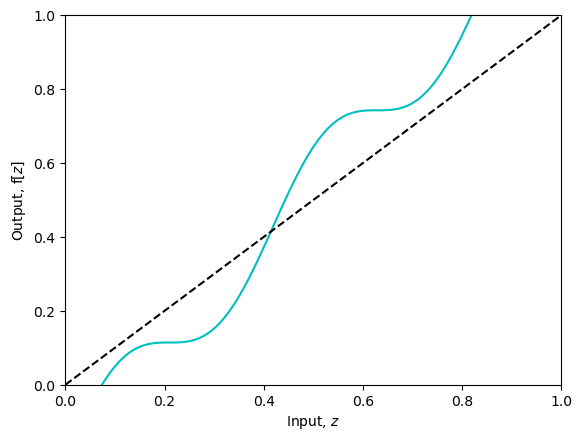

In [13]:
# Now let's test that
# TODO Before running this code, predict what you think will happen
#Converged (i miss)
z = fixed_point_iteration(f3, 0.7)
draw_function(f3, z)

Finally, let's invert a problem of the form $y = z+ f[z]$  for a given value of $y$. What is the $z$ that maps to it?

In [14]:
def f4(z):
   return -0.3 + 0.5 *z + 0.02 * np.sin(z*15)

In [18]:
def fixed_point_iteration_z_plus_f(f, y, z0):
  # TODO -- write this function
  # Replace this line
  z = z0
  max_iterations = 20
    
  for i in range(max_iterations):
      z_new = y - f(z)
      print(f"Iteration {i+1}: z = {z_new:.6f}")
        
      if abs(z_new - z) < 1e-6:  # Convergence check
          print("Converged")
          return z_new
        
      z = z_new
    
  print("Maximum iterations reached without convergence.")
  return z

In [16]:
def draw_function2(f, y, fixed_point=None):
  z = np.arange(0,1,0.01)
  z_prime = z+f(z)

  # Draw this function
  fig, ax = plt.subplots()
  ax.plot(z, z_prime,'c-')
  ax.plot(z, y-f(z),'r-')
  ax.plot([0,1],[0,1],'k--')
  if fixed_point!=None:
    ax.plot(fixed_point, y, 'ro')
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_xlabel('Input, $z$')
  ax.set_ylabel('Output, z+f$[z]$')
  plt.show()

Iteration 1: z = 0.997178
Iteration 2: z = 0.587774
Iteration 3: z = 0.794686
Iteration 4: z = 0.714698
Iteration 5: z = 0.761899
Iteration 6: z = 0.737206
Iteration 7: z = 0.751358
Iteration 8: z = 0.743571
Iteration 9: z = 0.747966
Iteration 10: z = 0.745518
Iteration 11: z = 0.746892
Iteration 12: z = 0.746124
Iteration 13: z = 0.746554
Iteration 14: z = 0.746313
Iteration 15: z = 0.746448
Iteration 16: z = 0.746373
Iteration 17: z = 0.746415
Iteration 18: z = 0.746391
Iteration 19: z = 0.746405
Iteration 20: z = 0.746397
Maximum iterations reached without convergence.


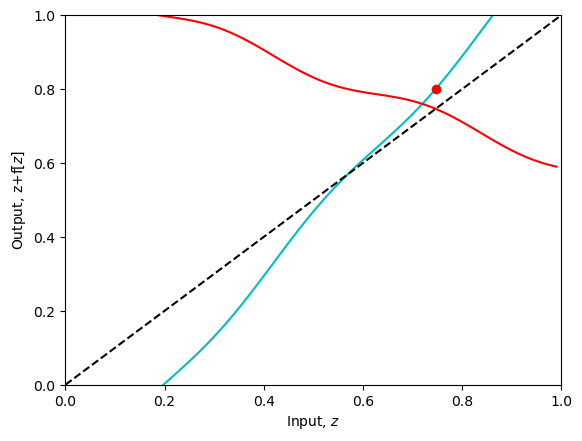

In [17]:
# Test this out and draw
y = 0.8
z = fixed_point_iteration_z_plus_f(f4,y,0.2)
draw_function2(f4,y,z)
# If you have done this correctly, the red dot should be
# where the cyan curve has a y value of 0.8